# Compute Subcellular Spatial Features

**Author**: Clarence Mah<br>
**Last Updated**: 6/5/2022

Here we will demonstrate how to compute various subcellular spatial features with `bento`. We will use the included seqFISH+ dataset.

# Load Libraries

In [6]:
import bento
import seaborn as sns

# Load Data

Let's start with the preprocessed seqFISH+ data.

In [2]:
adata = bento.datasets.load_dataset('seqfish')

There are a number of tools to compute cell-level features. List available features like so.

In [3]:
bento.tl.cell_features.keys()

dict_keys(['cell_span', 'cell_bounds', 'cell_moments', 'raster_cell', 'cell_aspect_ratio', 'cell_density', 'cell_area', 'cell_perimeter', 'cell_radius'])

We can compute a single feature...

In [4]:
bento.tl.cell_area(adata)

AnnData object modified:
    obs:
        + cell_area


Or conveniently, a whole set of features simultaneously.

In [9]:
some_features = ["cell_area", "cell_density", "cell_aspect_ratio"]
bento.tl.analyze_cells(adata, some_features)

  0%|          | 0/3 [00:00<?, ?it/s]

AnnData object modified:
    obs:
        + cell_density, cell_aspect_ratio


For starters, we can study pairwise relationships of these cell features.

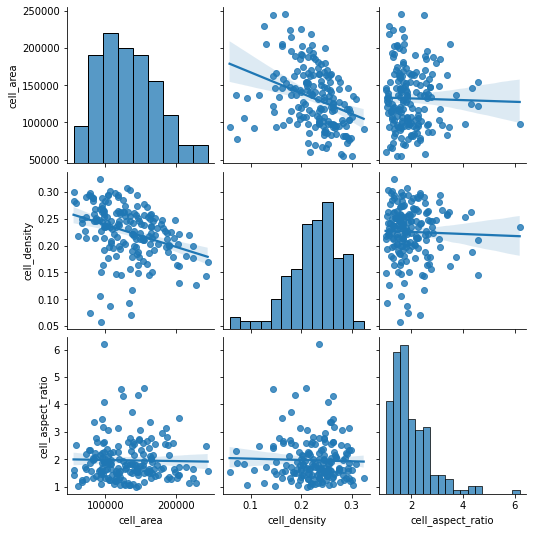

In [10]:
sns.pairplot(
    data=adata.obs[["cell_area", "cell_density", "cell_aspect_ratio"]],
    kind="reg",
)

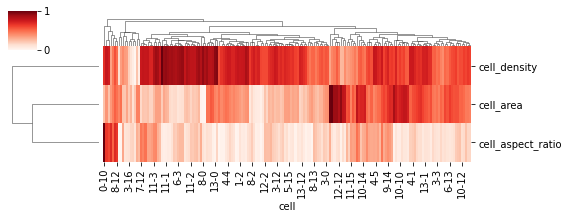

In [21]:
sns.clustermap(
    adata.obs[["cell_area", "cell_density", "cell_aspect_ratio"]].T,
    standard_scale=0,
    figsize=(8, 3),
    cmap="Reds",
)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

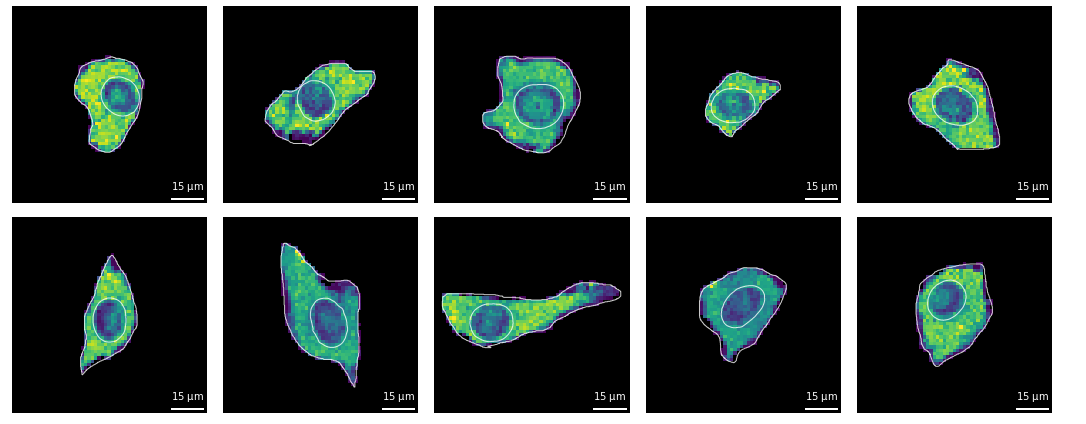

In [27]:
dense_cells = adata.obs["cell_density"].sort_values(ascending=False).index[:10]
bento.pl.cellplot(adata[dense_cells], col="cell", col_wrap=5, height=3)

Similarly, we can compute subcellular spatial features for samples (sample corresponds to molecules for a given cell-gene pair), to produce high-dimensional feature spaces. 

In [22]:
bento.tl.sample_features.keys()

dict_keys(['cell_proximity', 'nucleus_proximity', 'cell_asymmetry', 'nucleus_asymmetry', 'point_dispersion', 'nucleus_dispersion', 'ripley_stats', 'nucleus_enrichment'])

In [ ]:
bento.tl.analyze_samples(
    adata, ['cell_proximity', 'nucleus_proximity', 'point_dispersion'], chunksize=100
)

```{note}
`Bento` is able to utilize these feature spaces for predicting RNA localization patterns. For unsupervised analysis, `Bento` implements tensor decomposition to generate interpretable low dimensional signatures.
```